In [390]:
# Import the necessary libraries

import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import label
from sklearn.preprocessing import StandardScaler
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [445]:
# Define a function to calculate the fractal dimension

def fractal_dimension(largest_cluster_mask):
     # Calculate the number of boxes needed to cover the largest cluster
    num_boxes = np.log10(largest_cluster_mask.sum())

    # Calculate the size of each box
    box_size = np.log10(largest_cluster_mask.shape[0])

    # Calculate the fractal dimension
    fractal_dimension = num_boxes / box_size

    return fractal_dimension, num_boxes, box_size

In [446]:
# Construct a random 2D array of zeros and ones with probabilities of ones ranging from 0.1 to 0.8

for i in range(8):
    for j in range(8):

        globals()[f"z{i}_{j}"] = np.random.choice([0, 1], size=(100,100), p=[10**(-1)*(i+1), 1.0-10**(-1)*(i+1)]);

        # Label clusters in the z array
        globals()[f"clusters{i}_{j}"], globals()[f"num_clusters{i}_{j}"] = label(globals()[f"z{i}_{j}"])

        # Find the largest cluster
        globals()[f"largest_cluster{i}_{j}"] = np.argmax(np.bincount(globals()[f"clusters{i}_{j}"].flat)[1:]) + 1

        # Create a mask for the largest cluster
        globals()[f"largest_cluster_mask{i}_{j}"] = (globals()[f"clusters{i}_{j}"] == globals()[f"largest_cluster{i}_{j}"])

        # Plot the largest cluster with a different color
        globals()[f"protein{i}_{j}"] = np.where(globals()[f"largest_cluster_mask{i}_{j}"], globals()[f"z{i}_{j}"], 0)


In [447]:
# Create a 4D array to store the random 2D array of zeros and ones with probabilities of ones ranging from 0.1 to 0.8

p = np.zeros((8, 8, 100, 100))

for i in range(8):
    for j in range(8):
        p[i, j,:] = globals()[f"protein{i}_{j}"]


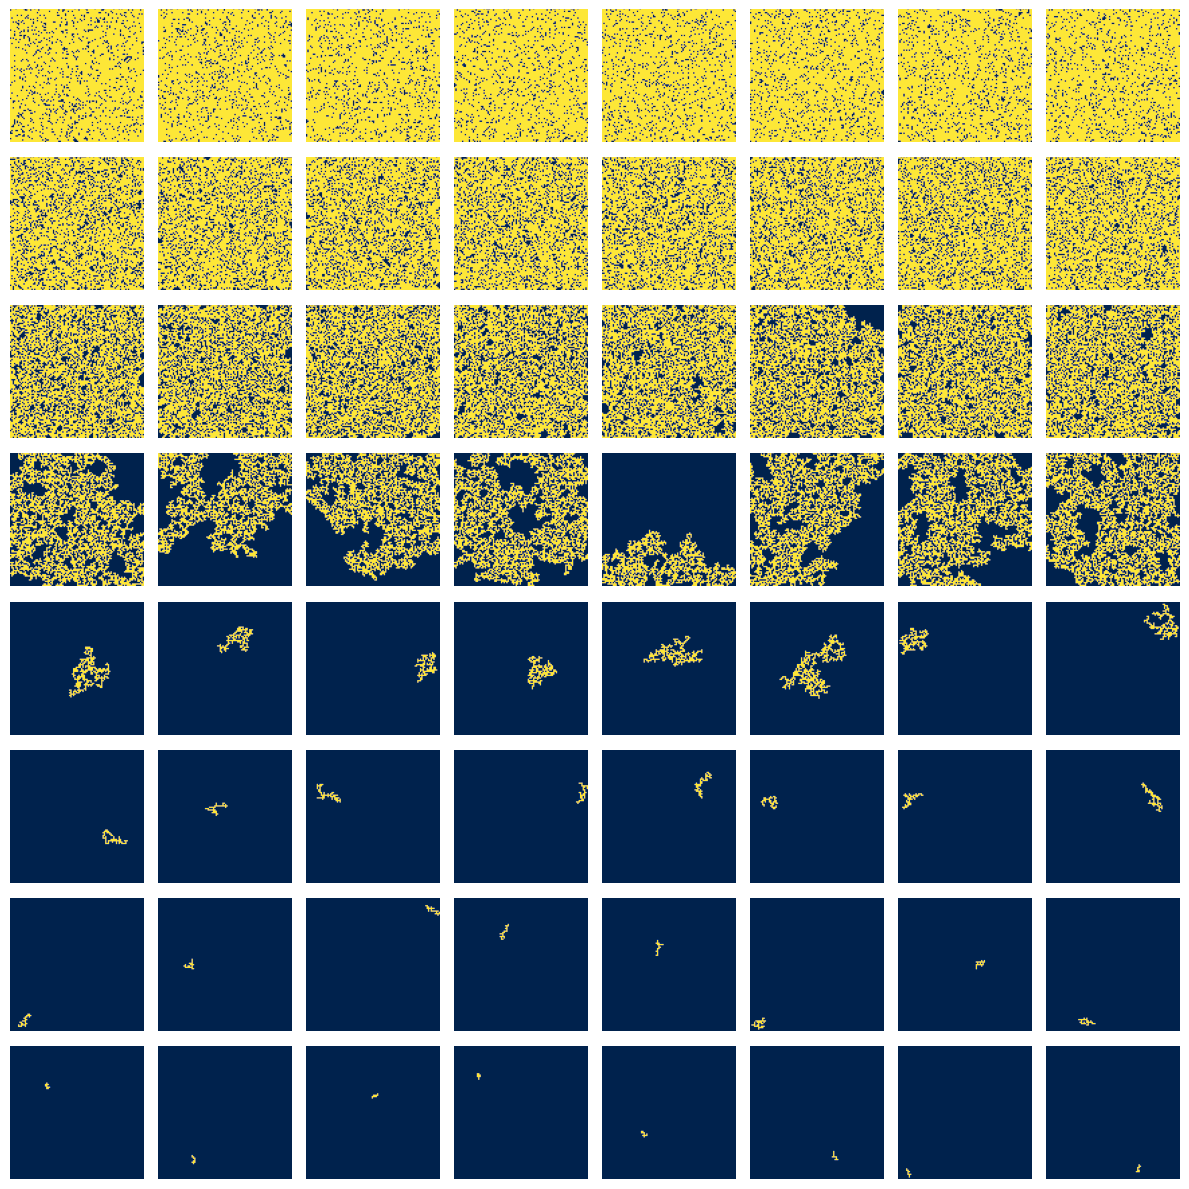

In [448]:
# Create a figure with an 8x8 grid of random 2D array of zeros and ones with probabilities of ones ranging from 0.1 to 0.8

fig, axes = plt.subplots(8, 8, figsize=(12, 12))

# Iterate over the grid and plot the data

for i in range(8):
    for j in range(8):
        ax = axes[i, j]
        ax.imshow(p[i, j, :], cmap='cividis')
        ax.axis('off')  # Hide the axes for better visualization

plt.tight_layout()
plt.show()


In [449]:
# Initialize the classifier model

from sklearn.svm import SVC
model = SVC()


In [450]:
# Reshape the 8x8 grid of random 2D array of zeros and ones with probabilities of ones ranging from 0.1 to 0.8 fro training

p = p.reshape(64, 10000)


In [451]:
# Set the targeting variable for training the model by naked eye

y = np.zeros(64)

y[0:24] = -1
y[24:32] = 0
y[32:64] = 1

In [452]:
# Fit the model to the data

model.fit(p, y)


SVC()

In [453]:
# Initialize another 8x8 grid of random 2D array of zeros and ones with probabilities of ones ranging from 0.1 to 0.8 for testing

for i in range(8):
    for j in range(8):

        globals()[f"z{i}_{j}"] = np.random.choice([0, 1], size=(100,100), p=[10**(-1)*(i+1), 1.0-10**(-1)*(i+1)]);

        # Label clusters in the z array
        globals()[f"clusters{i}_{j}"], globals()[f"num_clusters{i}_{j}"] = label(globals()[f"z{i}_{j}"])

        # Find the largest cluster
        globals()[f"largest_cluster{i}_{j}"] = np.argmax(np.bincount(globals()[f"clusters{i}_{j}"].flat)[1:]) + 1

        # Create a mask for the largest cluster
        globals()[f"largest_cluster_mask{i}_{j}"] = (globals()[f"clusters{i}_{j}"] == globals()[f"largest_cluster{i}_{j}"])

        # Plot the largest cluster with a different color
        globals()[f"protein{i}_{j}"] = np.where(globals()[f"largest_cluster_mask{i}_{j}"], globals()[f"z{i}_{j}"], 0)

# Create a 4D array to store the random 2D array of zeros and ones with probabilities of ones ranging from 0.1 to 0.8

q = np.zeros((8, 8, 100, 100))

for i in range(8):
    for j in range(8):
        q[i, j,:] = globals()[f"protein{i}_{j}"]

In [454]:
# Predict the target variable for the 8x8 grid of random 2D array of zeros and ones with probabilities of ones ranging from 0.1 to 0.8

q = q.reshape(64, 10000)

# Permute the position of the random 2D array of zeros and ones with probabilities of ones ranging from 0.1 to 0.8

np.random.shuffle(p)

perm1 = np.random.permutation(p.shape[0])

q = q[perm1,:]


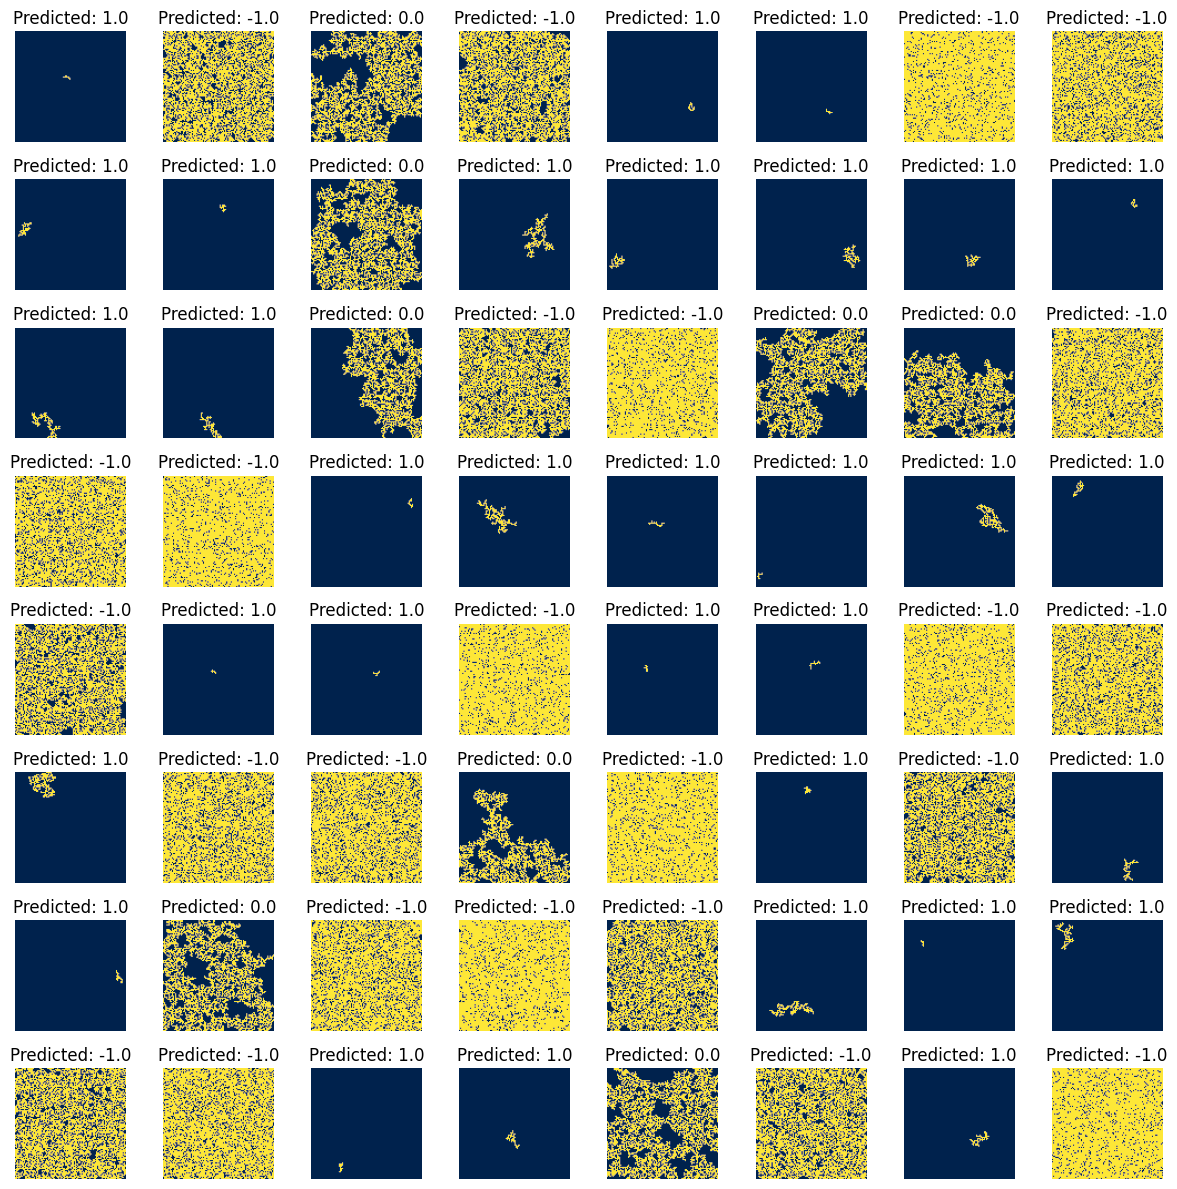

In [455]:
# Predict the target variable for the 8x8 grid of random 2D array of zeros and ones with probabilities of ones ranging from 0.1 to 0.8

y_model = model.predict(q)

# Reshape the 8x8 grid of random 2D array of zeros and ones with probabilities of ones ranging from 0.1 to 0.8 for plot

q = q.reshape(8, 8, 100, 100)

# Create a figure with an 8x8 grid of subplots
fig, axes = plt.subplots(8, 8, figsize=(12, 12))

# Iterate over the grid and plot the data

for i in range(8):
    for j in range(8):
        ax = axes[i, j]
        ax.imshow(q[i, j, :], cmap='cividis')
        ax.axis('off')  # Hide the axes for better visualization
        ax.set_title(f'Predicted: {y_model[i*8+j]}')

plt.tight_layout()
plt.show()

In [ ]:
# Attenuation project

# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

# Reshape the data to (64, 10000)
p_reshaped = p.reshape(64, 10000)

# Apply StandardScaler to attenuate the images
scaler = StandardScaler()
p_attenuated = scaler.fit_transform(p_reshaped)
p_attenuated_attenuated = scaler.fit_transform(p_attenuated)
p_attenuated_attenuated_attenuated = scaler.fit_transform(p_attenuated_attenuated)

# Reshape back to original dimensions (8, 8, 100, 100)
p_attenuated = p_attenuated.reshape(8, 8, 100, 100)
p_attenuated_attenuated = p_attenuated_attenuated.reshape(8, 8, 100, 100)
p_attenuated_attenuated_attenuated = p_attenuated_attenuated.reshape(8, 8, 100, 100)

for j in range(8):
    fig, axes = plt.subplots(4, 8, figsize=(16, 4))
    for i in range(8):
        # Original image
        ax = axes[0, i]
        ax.imshow(p[j, i], cmap='viridis', aspect='auto')
        ax.axis('off')
        ax.set_title(f'{j}th Original {i+1}')
    
        # Attenuated image
        ax = axes[1, i]
        ax.imshow(p_attenuated[j, i], cmap='viridis', aspect='auto')
        ax.axis('off')
        ax.set_title(f'{j}th Attenuated {i+1}')

        # Attenuated Attenuated image
        ax = axes[2, i]
        ax.imshow(p_attenuated_attenuated[j, i], cmap='viridis', aspect='auto')
        ax.axis('off')
        ax.set_title(f'{j}th Attenuated {i+1}')

        # Attenuated Attenuated image
        ax = axes[3, i]
        ax.imshow(p_attenuated_attenuated_attenuated[j, i], cmap='viridis', aspect='auto')
        ax.axis('off')
        ax.set_title(f'{j}th Attenuated {i+1}')

    plt.tight_layout()
    plt.show() 

p = p_attenuated_attenuated_attenuated

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Iterate over all slices and apply MinMax scaling
for i in range(8):
    for j in range(8):
        # Flatten the 2D slice to 1D
        slice_2d = p[i, j, :, :].reshape(-1, 1)
        
        # Apply MinMax scaling
        slice_2d_scaled = scaler.fit_transform(slice_2d)
        
        # Reshape back to 2D
        p[i, j, :, :] = slice_2d_scaled.reshape(100, 100)

# Plot the scaled images for verification
fig, axes = plt.subplots(8, 8, figsize=(12, 12))

for i in range(8):
    for j in range(8):
        ax = axes[i, j]
        ax.imshow(p[i, j, :, :], cmap='viridis', aspect='auto')
        ax.axis('off')

plt.tight_layout()
plt.show()

# Save the scaled images into the directory
output_dir = 'output_images'
os.makedirs(output_dir, exist_ok=True)

for i in range(8):
    for j in range(8):
        fig, ax = plt.subplots(figsize=(2, 2))
        ax.imshow(p[i, j, :, :], cmap='viridis', aspect='auto')
        ax.axis('off')
        plt.tight_layout()
        fig.savefig(os.path.join(output_dir, f'scaled_image_{i}_{j}.png'))
        plt.close(fig)

# Specify the number of clusters (digits)
n_clusters = 10

# Create the output directory if it doesn't exist
output_dir = 'output_images'
os.makedirs(output_dir, exist_ok=True)

# Iterate over all slices and apply K-means clustering
for i in range(8):
    for j in range(8):
        # Flatten the 2D slice to 1D
        slice_2d = p[i, j, :, :].reshape(-1, 1)
        
        # Apply K-means clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=0)
        kmeans.fit(slice_2d)
        
        # Replace the original values with the cluster centroids
        slice_2d_clustered = kmeans.cluster_centers_[kmeans.labels_]
        
        # Reshape back to 2D
        globals()[f"p_digitized_{i}_{j}"] = slice_2d_clustered.reshape(100, 100)
        
        # Plot the digitized image
        fig, ax = plt.subplots(figsize=(2, 2))
        ax.imshow(globals()[f"p_digitized_{i}_{j}"], cmap='viridis', aspect='auto')
        ax.axis('off')
        plt.tight_layout()
        
        # Save the digitized image
        fig.savefig(os.path.join(output_dir, f'digitized_image_{i}_{j}.png'))
        plt.close(fig)

# Plot the digitized images for verification
fig, axes = plt.subplots(8, 8, figsize=(12, 12))

for i in range(8):
    for j in range(8):
        ax = axes[i, j]
        ax.imshow(p[i, j, :, :], cmap='viridis', aspect='auto')
        ax.axis('off')

plt.tight_layout()
plt.show()

p_digitized = np.zeros((8, 8, 100, 100))

for i in range(8):
    for j in range(8):
        p_digitized[i, j, :] = globals()[f"p_digitized_{i}_{j}"]

p = p_digitized

# Specify the number of clusters (digits)
n_clusters = 10

# Create the output directory if it doesn't exist
output_dir = 'output_images'
os.makedirs(output_dir, exist_ok=True)

# Iterate over all slices and apply K-means clustering
for i in range(8):
    for j in range(8):
        # Flatten the 2D slice to 1D
        slice_2d = p[i, j, :, :].reshape(-1, 1)
        
        # Apply K-means clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=0)
        kmeans.fit(slice_2d)
        
        # Replace the original values with the cluster centroids
        slice_2d_clustered = kmeans.cluster_centers_[kmeans.labels_]
        
        # Reshape back to 2D
        globals()[f"p_digitized_{i}_{j}"] = slice_2d_clustered.reshape(100, 100)
        
        # Plot the digitized image
        fig, ax = plt.subplots(figsize=(2, 2))
        ax.imshow(globals()[f"p_digitized_{i}_{j}"], cmap='viridis', aspect='auto')
        ax.axis('off')
        plt.tight_layout()
        
        # Save the digitized image
        fig.savefig(os.path.join(output_dir, f'digitized_image_{i}_{j}.png'))
        plt.close(fig)

# Plot the digitized images for verification
fig, axes = plt.subplots(8, 8, figsize=(12, 12))

for i in range(8):
    for j in range(8):
        ax = axes[i, j]
        ax.imshow(p[i, j, :, :], cmap='gray', aspect='auto')
        ax.axis('off')

plt.tight_layout()
plt.show()